# Imports

In [1]:
import os 
os.getcwd() # RUN THIS FROM SimpleHTR !! 

'c:\\Users\\anial\\Downloads\\capstone-htr\\SimpleHTR'

# Simple inference example on original model

In [1]:
from src.dataloader_iam import DataLoaderIAM, Batch
from src.model import Model, DecoderType
from src.preprocessor import Preprocessor
import tensorflow as tf
import os
import cv2


In [3]:
#this is the character list, as this is just an inference stage here its still eng letters (+nums, some other chars)
with open('model/charList.txt') as f:
    char_list = list(f.read())

In [4]:
char_list

[' ',
 '!',
 '"',
 '#',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [6]:
decoder_type = DecoderType.BestPath #this was like that in main.py
tf.compat.v1.reset_default_graph()
model = Model(char_list, 
              decoder_type=decoder_type, 
              must_restore=True, # remember!! must_restore = True means it loads from a checkpoint
              specified_model_path = './model_arm/' #!! added a new parameter to point to the fine-tuned model dir
              ) 

Python: 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
Tensorflow: 2.4.0
[DEBUG] Looking for model in: c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_arm
Init with stored values from c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_arm\snapshot-33
INFO:tensorflow:Restoring parameters from c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_arm\snapshot-33


In [7]:
os.getcwd() #!!REMEMBER you have to run from SimpleHTR so the model init wont crash again

'c:\\Users\\anial\\Downloads\\capstone-htr\\SimpleHTR'

In [8]:
img_path = './data/word.png'  #their provided iam word example
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [9]:
'''def get_img_height() -> int:
    """Fixed height for NN."""
    return 32


def get_img_size(line_mode: bool = False) -> Tuple[int, int]:
    """Height is fixed for NN, width is set according to training mode (single words or text lines)."""
    if line_mode:
        return 256, get_img_height()
    return 128, get_img_height()'''

'def get_img_height() -> int:\n    """Fixed height for NN."""\n    return 32\n\n\ndef get_img_size(line_mode: bool = False) -> Tuple[int, int]:\n    """Height is fixed for NN, width is set according to training mode (single words or text lines)."""\n    if line_mode:\n        return 256, get_img_height()\n    return 128, get_img_height()'

In [10]:
#see above how these were defined in main, I just hardcoded the word-level values here for sizes 
#the padding = 16 was also from there
preprocessor = Preprocessor(img_size=(128, 32), dynamic_width=True, padding = 16) 
img = preprocessor.process_img(img)
batch = Batch([img], None, 1)

In [11]:
recognized, probability = model.infer_batch(batch, calc_probability=True)
print('Recognized:', recognized[0])
print('Probability:', probability[0])

Recognized: word
Probability: 0.9513834


In [12]:
for v in tf.compat.v1.global_variables():
    print(v.name, v.shape)

Variable:0 (5, 5, 1, 32)
batch_normalization/gamma:0 (32,)
batch_normalization/beta:0 (32,)
batch_normalization/moving_mean:0 (32,)
batch_normalization/moving_variance:0 (32,)
Variable_1:0 (5, 5, 32, 64)
batch_normalization_1/gamma:0 (64,)
batch_normalization_1/beta:0 (64,)
batch_normalization_1/moving_mean:0 (64,)
batch_normalization_1/moving_variance:0 (64,)
Variable_2:0 (3, 3, 64, 128)
batch_normalization_2/gamma:0 (128,)
batch_normalization_2/beta:0 (128,)
batch_normalization_2/moving_mean:0 (128,)
batch_normalization_2/moving_variance:0 (128,)
Variable_3:0 (3, 3, 128, 128)
batch_normalization_3/gamma:0 (128,)
batch_normalization_3/beta:0 (128,)
batch_normalization_3/moving_mean:0 (128,)
batch_normalization_3/moving_variance:0 (128,)
Variable_4:0 (3, 3, 128, 256)
batch_normalization_4/gamma:0 (256,)
batch_normalization_4/beta:0 (256,)
batch_normalization_4/moving_mean:0 (256,)
batch_normalization_4/moving_variance:0 (256,)
bidirectional_rnn/fw/multi_rnn_cell/cell_0/lstm_cell/kernel


- Variable:0 (5, 5, 1, 32) = 5×5 kernel, 1 input channel (grayscale), 32 output filters  
- batch_normalization/gamma:0 (32,) = scale parameter for 32 channels  
- batch_normalization/beta:0 (32,) = shift parameter for 32 channels  
- batch_normalization/moving_mean:0 (32,) = running mean for 32 channels  
- batch_normalization/moving_variance:0 (32,) = running variance for 32 channels  

- Variable_1:0 (5, 5, 32, 64) = 5×5 kernel, 32 input channels, 64 output filters  
- batch_normalization_1/gamma:0 (64,)  
- batch_normalization_1/beta:0 (64,)  
- batch_normalization_1/moving_mean:0 (64,)  
- batch_normalization_1/moving_variance:0 (64,)  

- Variable_2:0 (3, 3, 64, 128) = 3×3 kernel, 64 input channels, 128 output filters  
- batch_normalization_2/gamma:0 (128,)  
- batch_normalization_2/beta:0 (128,)  
- batch_normalization_2/moving_mean:0 (128,)  
- batch_normalization_2/moving_variance:0 (128,)  

- Variable_3:0 (3, 3, 128, 128) = 3×3 kernel, 128 input channels, 128 output filters  
- batch_normalization_3/gamma:0 (128,)  
- batch_normalization_3/beta:0 (128,)  
- batch_normalization_3/moving_mean:0 (128,)  
- batch_normalization_3/moving_variance:0 (128,)  

- Variable_4:0 (3, 3, 128, 256) = 3×3 kernel, 128 input channels, 256 output filters  
- batch_normalization_4/gamma:0 (256,)  
- batch_normalization_4/beta:0 (256,)  
- batch_normalization_4/moving_mean:0 (256,)  
- batch_normalization_4/moving_variance:0 (256,)  

 #### BiLSTMs

- bidirectional_rnn/fw/multi_rnn_cell/cell_0/lstm_cell/kernel:0 (512, 1024) = first LSTM layer, input 512, output 1024  
- bidirectional_rnn/fw/multi_rnn_cell/cell_0/lstm_cell/bias:0 (1024,)  

- bidirectional_rnn/fw/multi_rnn_cell/cell_1/lstm_cell/kernel:0 (512, 1024) = second LSTM layer, input 512, output 1024  
- bidirectional_rnn/fw/multi_rnn_cell/cell_1/lstm_cell/bias:0 (1024,)  

#### for english - now this part has to be changed to match armo
- Variable_5:0 (1, 1, 512, 80) = final projection layer, 1×1 kernel, 512 input channels, 80 output classes (chars + blank for CTC)   


# Setting up the environment for fine-tuning !!

### changing the output layer to match armo (did in model.py)

In [ ]:
with open('model_arm/charList.txt', encoding='utf-8') as f: #don't forget the encoding to avoid crashes
    char_list_armo = list(f.read()) #new armo charlist

In [ ]:
len(char_list_armo) #so the output should have all the specified tokens that sumed up to 100 + 1 for CTC blank

100

## The new dataloader

### remember to update pyproject toml to include basic packages!!  

In [ ]:
!python -m pip install pandas numpy matplotlib

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from src.dataloader_arm import DataLoaderARM, Batch
from src.preprocessor import Preprocessor
import os 
from pathlib import Path
import cv2
import time
import tensorflow as tf

In [6]:
os.getcwd()

'c:\\Users\\anial\\Downloads\\capstone-htr\\SimpleHTR'

### bringing my annotations tsv file to working project directory and cleaning it up

In [ ]:
#no need to run again it is already here !!
df = pd.read_csv("../../annotations.tsv", sep='\t', header=None, names=["img", "label"])
df = df[df["label"] != "bad"]
df.to_csv("annotations_clean.txt", sep=' ', header=False, index=False)

### loading Armenian cropped-words data with new DataloaderARM class

In [19]:
data_dir = Path("./")  # the modified dataloader
loader = DataLoaderARM(data_dir=data_dir,
                        batch_size=4,
                          fast = False) #always set fast = False otherwise it loads some stuff i don't wanna deal with nope 

### sanity check - if the code crashed it means there are NaNs in the original annotation file 

In [8]:
df = pd.read_csv('annotations_clean.txt', sep=' ', header=None, names=['img', 'label'])
# my own sanity check did I skip annotation for some (most likely bad) files? if so go and fix
print(df.isna().sum())
print("\nRows with NaNs:")
print(df[df.isna().any(axis=1)])

img      0
label    0
dtype: int64

Rows with NaNs:
Empty DataFrame
Columns: [img, label]
Index: []


## testing the dataloader

In [4]:
batch = loader.get_next()
print("Batch size:", batch.batch_size)
print("Image shape:", batch.imgs[0].shape)
print("Labels:", batch.gt_texts)


Batch size: 4
Image shape: (41, 124)
Labels: ['տալ', 'Այդ', 'վրա', 'որ']


In [13]:
loader.samples

[Sample(gt_text='որոնք', file_path=WindowsPath('cropped_words/IMG_20250314_0001-04_word_98.png')),
 Sample(gt_text='մարդկային', file_path=WindowsPath('cropped_words/IMG_20250314_0001-21_word_77.png')),
 Sample(gt_text='փոքր', file_path=WindowsPath('cropped_words/IMG_20250314_0001-29_word_20.png')),
 Sample(gt_text='վերարկուն', file_path=WindowsPath('cropped_words/IMG_20250314_0001-15_word_54.png')),
 Sample(gt_text='ավելի', file_path=WindowsPath('cropped_words/IMG_20250314_0001-24_word_107.png')),
 Sample(gt_text='և', file_path=WindowsPath('cropped_words/IMG_20250314_0001-26_word_80.png')),
 Sample(gt_text='էլ', file_path=WindowsPath('cropped_words/armo_handwriting_word_24.png')),
 Sample(gt_text='Երկիրն', file_path=WindowsPath('cropped_words/IMG_20250314_0001-13_word_122.png')),
 Sample(gt_text='մայրիկին,', file_path=WindowsPath('cropped_words/IMG_20250314_0001-30_word_77.png')),
 Sample(gt_text='Գինիները,', file_path=WindowsPath('cropped_words/IMG_20250314_0001-01_word_64.png')),
 Sa

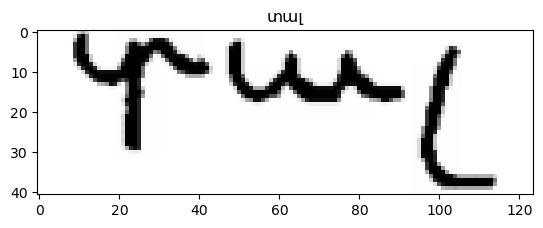

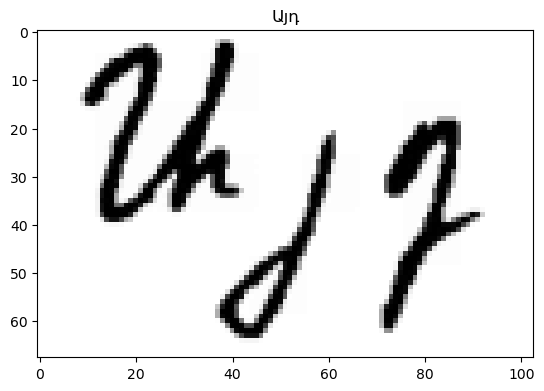

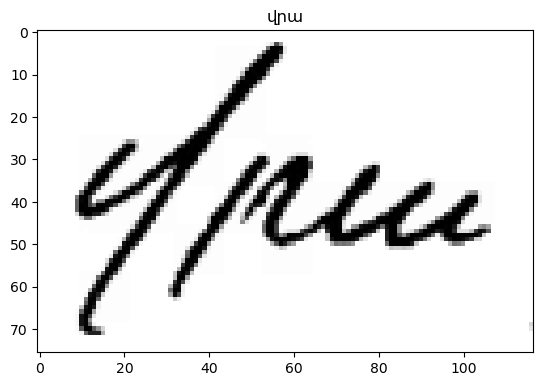

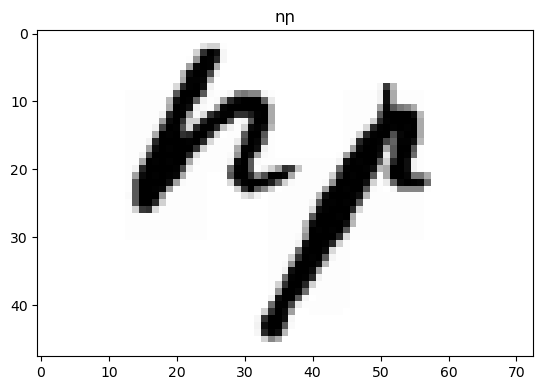

In [5]:
for i in range(batch.batch_size):
    plt.imshow(batch.imgs[i], cmap='gray')
    plt.title(batch.gt_texts[i])
    plt.show()


## Setting up the environment for training

### Just a few steps that are already done (for my own checklist too)

- New model directory model_arm 
- New dataloader class DataloaderARM
- new charlist with Armenian lowercase and uppercase letters 
- changed the last layer to have 101 outputs instead of 80 (eng)
- added a fine-tune parameter in model.py to handle the transition
- handled the case of resuming the training for the arm model 
- `TODO` still have to solve the issue of the Armenian corpus in ./data

In [1]:
from src.dataloader_arm import DataLoaderARM
from src.model import Model, DecoderType #all changes are done in the same place
from pathlib import Path
from src.preprocessor import Preprocessor
from datetime import datetime
from src.main import validate, infer
import json
import tensorflow as tf
import pandas as pd

In [2]:
with open('model_arm/charList.txt', encoding='utf-8') as f:
    char_list = list(f.read()) #loading the new Armenian charlist defined in model_arm
tf.compat.v1.reset_default_graph()

model = Model(
    char_list=char_list,
    decoder_type=DecoderType.BestPath,
    must_restore=True, #restoring everything but last layer 
    fine_tune=True, #added to explicitly show that the last layer should be dropped, 
                    #later for resumed training it fill be set to False 
    specified_model_path='model_arm/'  #loading the original model copy from model_arm to then do changes in there
)

c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:903: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Python: 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
Tensorflow: 2.4.0
[DEBUG] Looking for model in: c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_arm
Init with stored values from c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_arm\snapshot-33
INFO:tensorflow:Restoring parameters from c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_arm\snapshot-33


In [3]:
char_list

['՝',
 '՜',
 ':',
 '՞',
 '«',
 '»',
 ',',
 '.',
 '-',
 '(',
 ')',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Ա',
 'Բ',
 'Գ',
 'Դ',
 'Ե',
 'Զ',
 'Է',
 'Ը',
 'Թ',
 'Ժ',
 'Ի',
 'Լ',
 'Խ',
 'Ծ',
 'Կ',
 'Հ',
 'Ձ',
 'Ղ',
 'Ճ',
 'Մ',
 'Յ',
 'Ն',
 'Շ',
 'Ո',
 'Չ',
 'Պ',
 'Ջ',
 'Ռ',
 'Ս',
 'Վ',
 'Տ',
 'Ր',
 'Ց',
 'Ւ',
 'Փ',
 'Ք',
 'Օ',
 'Ֆ',
 'ա',
 'բ',
 'գ',
 'դ',
 'ե',
 'զ',
 'է',
 'ը',
 'թ',
 'ժ',
 'ի',
 'լ',
 'խ',
 'ծ',
 'կ',
 'հ',
 'ձ',
 'ղ',
 'ճ',
 'մ',
 'յ',
 'ն',
 'շ',
 'ո',
 'չ',
 'պ',
 'ջ',
 'ռ',
 'ս',
 'վ',
 'տ',
 'ր',
 'ց',
 'ւ',
 'փ',
 'ք',
 'և',
 'օ',
 'ֆ']

### very important sanity check, make sure Variable5:0 shows 99 !!
՝՜։՞«»․,-()0123456789ԱԲԳԴԵԶԷԸԹԺԻԼԽԾԿՀՁՂՃՄՅՆՇՈՉՊՋՌՍՎՏՐՑՒՓՔՕՖաբգդեզէըթժիլխծկհձղճմյնշոչպջռսվտրցւփքևօֆ

In [4]:
for v in tf.compat.v1.global_variables(): 
    print(v.name, v.shape)

#yes it does !! everything associated with Var 5:0 shows 99 !!

Variable:0 (5, 5, 1, 32)
batch_normalization/gamma:0 (32,)
batch_normalization/beta:0 (32,)
batch_normalization/moving_mean:0 (32,)
batch_normalization/moving_variance:0 (32,)
Variable_1:0 (5, 5, 32, 64)
batch_normalization_1/gamma:0 (64,)
batch_normalization_1/beta:0 (64,)
batch_normalization_1/moving_mean:0 (64,)
batch_normalization_1/moving_variance:0 (64,)
Variable_2:0 (3, 3, 64, 128)
batch_normalization_2/gamma:0 (128,)
batch_normalization_2/beta:0 (128,)
batch_normalization_2/moving_mean:0 (128,)
batch_normalization_2/moving_variance:0 (128,)
Variable_3:0 (3, 3, 128, 128)
batch_normalization_3/gamma:0 (128,)
batch_normalization_3/beta:0 (128,)
batch_normalization_3/moving_mean:0 (128,)
batch_normalization_3/moving_variance:0 (128,)
Variable_4:0 (3, 3, 128, 256)
batch_normalization_4/gamma:0 (256,)
batch_normalization_4/beta:0 (256,)
batch_normalization_4/moving_mean:0 (256,)
batch_normalization_4/moving_variance:0 (256,)
bidirectional_rnn/fw/multi_rnn_cell/cell_0/lstm_cell/kernel

In [5]:
log_dir = './logs_arm/first_launch'
checkpoint_dir = './model_arm_checkpoints/'
summary_path = './model_arm_summary.json'
early_stopping = 10
batch_size = 100
line_mode = False #the downloaded model is the one trained on words this is very important! 

In [6]:
preprocessor = Preprocessor(img_size=(128, 32), data_augmentation=True, line_mode=line_mode) #loading preprocessor
# model is loaded above 
data_dir = Path("./")  # the modified dataloader
loader = DataLoaderARM(data_dir=data_dir,
                        batch_size=batch_size, # adding the batch size default was 100 
                        data_split = 0.75, # taking only a small selection of arm samples for sanity checking
                        fast = False) #always set fast = False otherwise it loads some stuff i don't wanna deal with nope train_writer = tf.summary.create_file_writer(log_dir)


In [7]:
len(loader.samples)

3258

### defining a training function like in main.py but adapting it to personal preferences

In [8]:
import os
import json
import editdistance
import tensorflow as tf

def train(model,
          loader,
          preprocessor,
          log_dir='./logs/',
          checkpoint_dir='./checkpoints/',
          summary_path='./summary.json',
          early_stopping=25,
          max_epochs=100,
          line_mode=False,
          compute_val_loss=False):
    """Trains NN with optional TensorBoard logging and validation loss computation."""

    epoch = 0
    no_improvement_since = 0
    best_char_error_rate = float('inf')

    summary_char_error_rates = []
    summary_word_accuracies = []
    average_train_loss = []
    val_losses = []

    os.makedirs(log_dir, exist_ok=True)
    os.makedirs(checkpoint_dir, exist_ok=True)
    train_writer = tf.summary.create_file_writer(log_dir)

    while epoch < max_epochs:
        epoch += 1
        print(f'Epoch: {epoch}')

        #training
        loader.train_set()
        train_loss_in_epoch = []

        while loader.has_next():
            iter_info = loader.get_iterator_info()
            batch = loader.get_next()
            batch = preprocessor.process_batch(batch)
            loss = model.train_batch(batch)
            print(f'Epoch: {epoch} Batch: {iter_info[0]}/{iter_info[1]} Loss: {loss:.4f}')
            train_loss_in_epoch.append(loss)

        avg_train_loss = sum(train_loss_in_epoch) / len(train_loss_in_epoch)
        average_train_loss.append(avg_train_loss)

        #validation
        loader.validation_set()
        val_loss_in_epoch = []

        num_char_err = 0
        num_char_total = 0
        num_word_ok = 0
        num_word_total = 0

        while loader.has_next():
            batch = loader.get_next()
            batch = preprocessor.process_batch(batch)
            recognized, _ = model.infer_batch(batch)

            if compute_val_loss:
                val_loss = model.validate_batch(batch) # forward pass with added function
                val_loss_in_epoch.append(val_loss)

            for i in range(len(recognized)):
                gt = batch.gt_texts[i]
                pred = recognized[i]
                num_word_ok += int(gt == pred)
                num_word_total += 1
                dist = editdistance.eval(gt, pred)
                num_char_err += dist
                num_char_total += len(gt)

        char_error_rate = num_char_err / num_char_total if num_char_total > 0 else 0
        word_accuracy = num_word_ok / num_word_total if num_word_total > 0 else 0

        summary_char_error_rates.append(char_error_rate)
        summary_word_accuracies.append(word_accuracy)

        if compute_val_loss:
            avg_val_loss = sum(val_loss_in_epoch) / len(val_loss_in_epoch)
            val_losses.append(avg_val_loss)
            print(f'Validation Loss: {avg_val_loss:.4f}')

        print(f'CER: {char_error_rate:.4f} | Word Accuracy: {word_accuracy:.4f}')

        #tensorboard 
        with train_writer.as_default():
            tf.summary.scalar('train_loss', avg_train_loss, step=epoch)
            tf.summary.scalar('char_error_rate', char_error_rate, step=epoch)
            tf.summary.scalar('word_accuracy', word_accuracy, step=epoch)
            if compute_val_loss:
                tf.summary.scalar('val_loss', avg_val_loss, step=epoch)

        #saving the best model checkpoint
        if char_error_rate < best_char_error_rate:
            print('Character error rate improved, saving model...')
            best_char_error_rate = char_error_rate
            no_improvement_since = 0
            model.save(checkpoint_dir)
        else:
            print(f'No improvement. Best CER: {best_char_error_rate * 100:.2f}%')
            no_improvement_since += 1

        if no_improvement_since >= early_stopping:
            print('Early stopping triggered.')
            break

    # saving the summary json
    summary = {
        'averageTrainLoss': average_train_loss,
        'charErrorRates': summary_char_error_rates,
        'wordAccuracies': summary_word_accuracies
    }
    if compute_val_loss:
        summary['averageValLoss'] = val_losses

    with open(summary_path, 'w', encoding='utf-8') as f:
        json.dump(summary, f, ensure_ascii=False)

    print('Training complete.')


In [9]:
log_dir

'./logs_arm/first_launch'

In [10]:
train_writer = tf.summary.create_file_writer(log_dir)

In [11]:
!tensorboard --logdir=logs_arm/

In [13]:
train(
    model=model,
    loader=loader,
    preprocessor=preprocessor,
    log_dir='./logs_arm/first_launch',
    checkpoint_dir='./model_checkpoints_armo/',
    summary_path='./model_summary_armo.json',
    early_stopping=10,
    max_epochs=3,  # small number to test 
    line_mode=False,
    compute_val_loss=True
)


Epoch: 1
Epoch: 1 Batch: 1/32 Loss: 123.3999
Epoch: 1 Batch: 2/32 Loss: 84.2058
Epoch: 1 Batch: 3/32 Loss: 30.8419
Epoch: 1 Batch: 4/32 Loss: 25.9687
Epoch: 1 Batch: 5/32 Loss: 30.1937
Epoch: 1 Batch: 6/32 Loss: 25.2785
Epoch: 1 Batch: 7/32 Loss: 24.5485
Epoch: 1 Batch: 8/32 Loss: 21.6578
Epoch: 1 Batch: 9/32 Loss: 20.8267
Epoch: 1 Batch: 10/32 Loss: 18.3206
Epoch: 1 Batch: 11/32 Loss: 20.9579
Epoch: 1 Batch: 12/32 Loss: 20.7521
Epoch: 1 Batch: 13/32 Loss: 20.6382
Epoch: 1 Batch: 14/32 Loss: 17.0258
Epoch: 1 Batch: 15/32 Loss: 20.5377
Epoch: 1 Batch: 16/32 Loss: 18.5608
Epoch: 1 Batch: 17/32 Loss: 18.9756
Epoch: 1 Batch: 18/32 Loss: 18.8078
Epoch: 1 Batch: 19/32 Loss: 18.3973
Epoch: 1 Batch: 20/32 Loss: 17.6448
Epoch: 1 Batch: 21/32 Loss: 18.8357
Epoch: 1 Batch: 22/32 Loss: 17.5805
Epoch: 1 Batch: 23/32 Loss: 17.4677
Epoch: 1 Batch: 24/32 Loss: 17.9615
Epoch: 1 Batch: 25/32 Loss: 19.2484
Epoch: 1 Batch: 26/32 Loss: 18.3506
Epoch: 1 Batch: 27/32 Loss: 16.9067
Epoch: 1 Batch: 28/32 Loss:

## small inference

In [14]:
os.listdir()

['.git',
 '.gitignore',
 'annotations_clean.txt',
 'annotations_clean_subset.txt',
 'cropped_words',
 'data',
 'doc',
 'fine_tuning.ipynb',
 'LICENSE.md',
 'logs_arm',
 'model',
 'model_arm',
 'model_arm_backup',
 'model_checkpoints_armo',
 'model_summary_armo.json',
 'README.md',
 'requirements.txt',
 'src']

In [16]:
import cv2
import matplotlib.pyplot as plt

In [26]:
img_path = './cropped_words/IMG_20250314_0001-01_word_39.png'  #random pic example
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

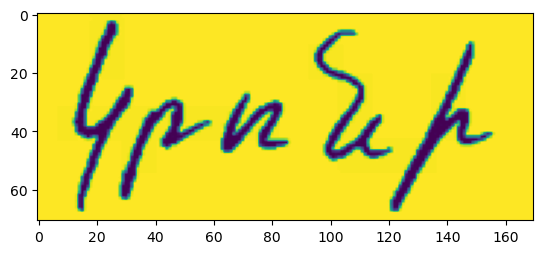

In [27]:
plt.imshow(img)

In [28]:
from src.dataloader_arm import Batch
img = preprocessor.process_img(img)
batch = Batch([img], None, 1)

In [29]:
recognized, _ = model.infer_batch(batch, calc_probability=False)
print('Recognized:', recognized[0])

Recognized: վրոնի
